In [1]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import matplotlib.pyplot as plt
import numpy as np

Importing plotly failed. Interactive plots will not work.


In [2]:
spy_full = pd.read_csv('..\Data\spy_full.csv')
spy_week = pd.read_csv('..\Data\spy_week.csv')
spy_month = pd.read_csv('..\Data\spy_month.csv')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Kaizu\AppData\Local\Temp\ipykernel_37220\1561699013.py:1: SyntaxWarning: invalid escape sequence '\D'
  spy_full = pd.read_csv('..\Data\spy_full.csv')
C:\Users\Kaizu\AppData\Local\Temp\ipykernel_37220\1561699013.py:2: SyntaxWarning: invalid escape sequence '\D'
  spy_week = pd.read_csv('..\Data\spy_week.csv')
C:\Users\Kaizu\AppData\Local\Temp\ipykernel_37220\1561699013.py:3: SyntaxWarning: invalid escape sequence '\D'
  spy_month = pd.read_csv('..\Data\spy_month.csv')


In [3]:
spy_full.head(), spy_week.head(), spy_month.head()

(   Unnamed: 0        date  adj_close  simple_return  log_return
 0           0  1993-01-29  24.608631            NaN         NaN
 1           1  1993-02-01  24.783640       0.007112    0.007087
 2           2  1993-02-02  24.836161       0.002119    0.002117
 3           3  1993-02-03  25.098705       0.010571    0.010516
 4           4  1993-02-04  25.203705       0.004183    0.004175,
          date  close_price  simple_return  log_return
 0  1993-02-07        24.78       0.007112    0.006884
 1  1993-02-14        25.19       0.000000    0.016410
 2  1993-02-21        24.35      -0.025228   -0.033915
 3  1993-02-28        24.49       0.003586    0.005733
 4  1993-03-07        24.80      -0.002815    0.012579,
          date  close_price  simple_return  log_return
 0  1993-02-01        24.78       0.007112    0.006884
 1  1993-03-01        24.80      -0.002815    0.000807
 2  1993-04-01        25.34      -0.003458    0.021541
 3  1993-05-01        24.94       0.006388   -0.015911
 4 

In [18]:
spy_full.tail(), spy_week.tail(), spy_month.tail()

(      Unnamed: 0         ds   adj_close  simple_return         y
 8015        8015 2024-11-27  598.830017      -0.003030 -0.003035
 8016        8016 2024-11-29  602.549988       0.006212  0.006193
 8017        8017 2024-12-02  603.630005       0.001792  0.001791
 8018        8018 2024-12-03  603.909973       0.000464  0.000464
 8019        8019 2024-12-04  607.659973       0.006210  0.006190,
              ds  close_price  simple_return         y
 1657 2024-11-10       569.81      -0.002154 -0.019155
 1658 2024-11-17       598.76       0.000953  0.049558
 1659 2024-11-24       588.15       0.004097 -0.017879
 1660 2024-12-01       597.53       0.003392  0.015822
 1661 2024-12-08       603.63       0.001792  0.010157,
             ds  close_price  simple_return         y
 378 2024-08-01       541.35      -0.014161 -0.004276
 379 2024-09-01       550.39      -0.020579  0.016561
 380 2024-10-01       568.62      -0.008958  0.032585
 381 2024-11-01       571.04       0.004221  0.004247
 3

# Renaming columns to fit Prophet model

In [4]:
for df in [spy_full, spy_week, spy_month]:
    # Rename columns to fit Prophet requirements
    df.rename(columns={'date': 'ds', 'log_return': 'y'}, inplace=True)
    
    # Ensure the 'ds' column is in datetime format
    df['ds'] = pd.to_datetime(df['ds'])

    # Drop rows with missing target values
    df.dropna(subset=['y'], inplace=True)


In [5]:
print(spy_full.head())

   Unnamed: 0         ds  adj_close  simple_return         y
1           1 1993-02-01  24.783640       0.007112  0.007087
2           2 1993-02-02  24.836161       0.002119  0.002117
3           3 1993-02-03  25.098705       0.010571  0.010516
4           4 1993-02-04  25.203705       0.004183  0.004175
5           5 1993-02-05  25.186195      -0.000695 -0.000695


# Initialising Prophet to fit the dataset

In [6]:
# Initiliasing the model
model = Prophet()

# Fitting model to full dataset
model.fit(spy_full)

timeframe = 365 * 20

# Creating a dataframe for future dates
future = model.make_future_dataframe(periods=timeframe)

# Predict future values
forecast_full = model.predict(future)

19:40:34 - cmdstanpy - INFO - Chain [1] start processing
19:40:34 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
print(forecast_full[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

              ds      yhat  yhat_lower  yhat_upper
15314 2044-11-25  0.001773   -0.012208    0.016371
15315 2044-11-26  0.005559   -0.009779    0.019783
15316 2044-11-27  0.005515   -0.010055    0.019778
15317 2044-11-28  0.001724   -0.012453    0.015337
15318 2044-11-29  0.001940   -0.013318    0.017512


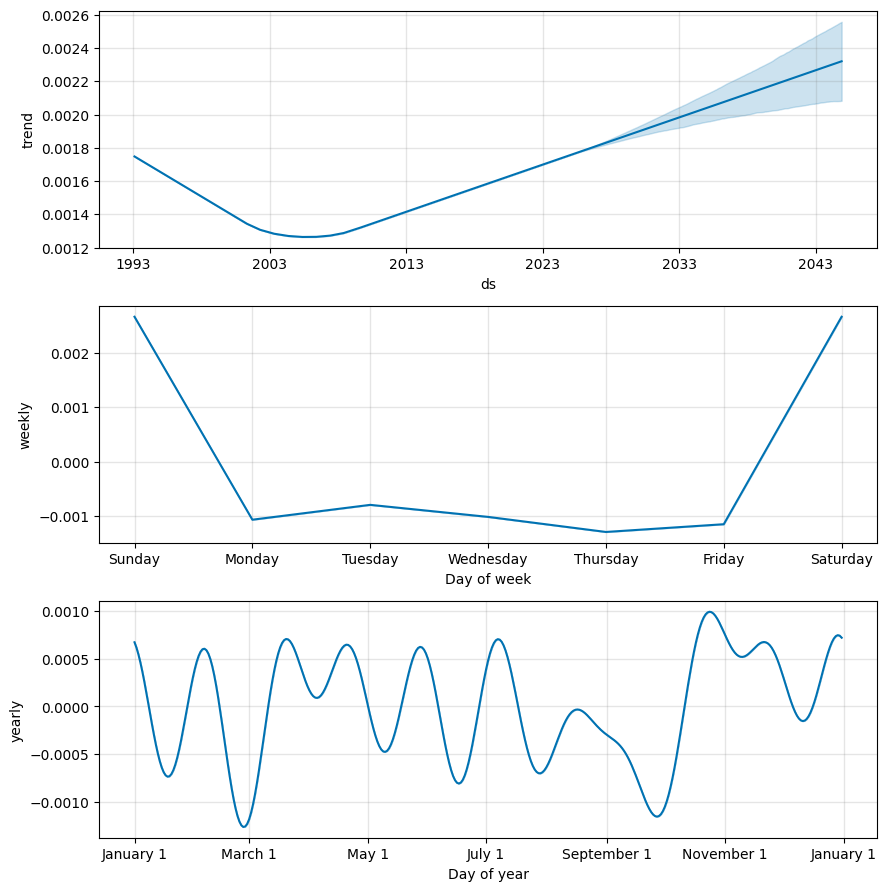

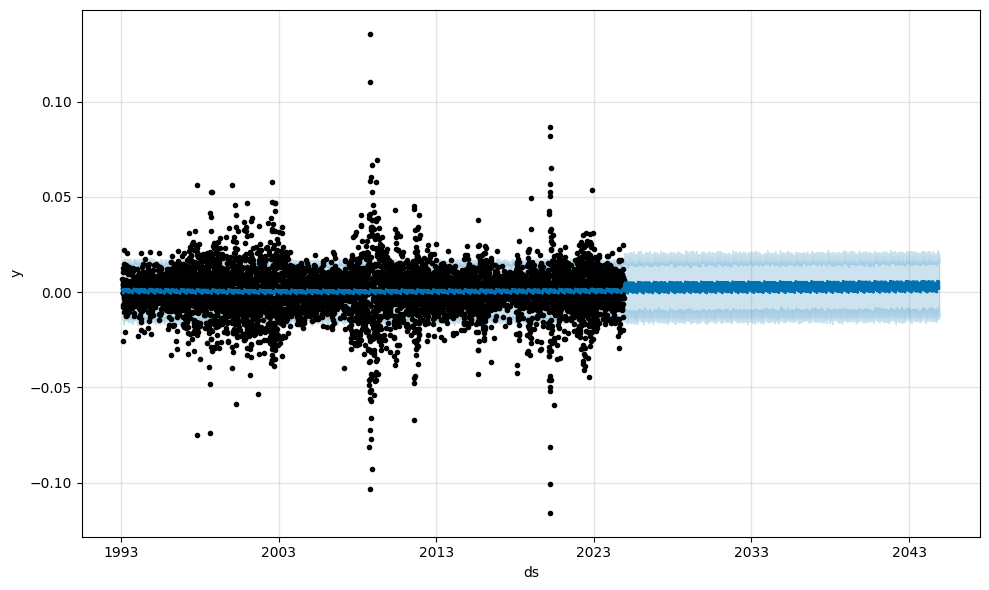

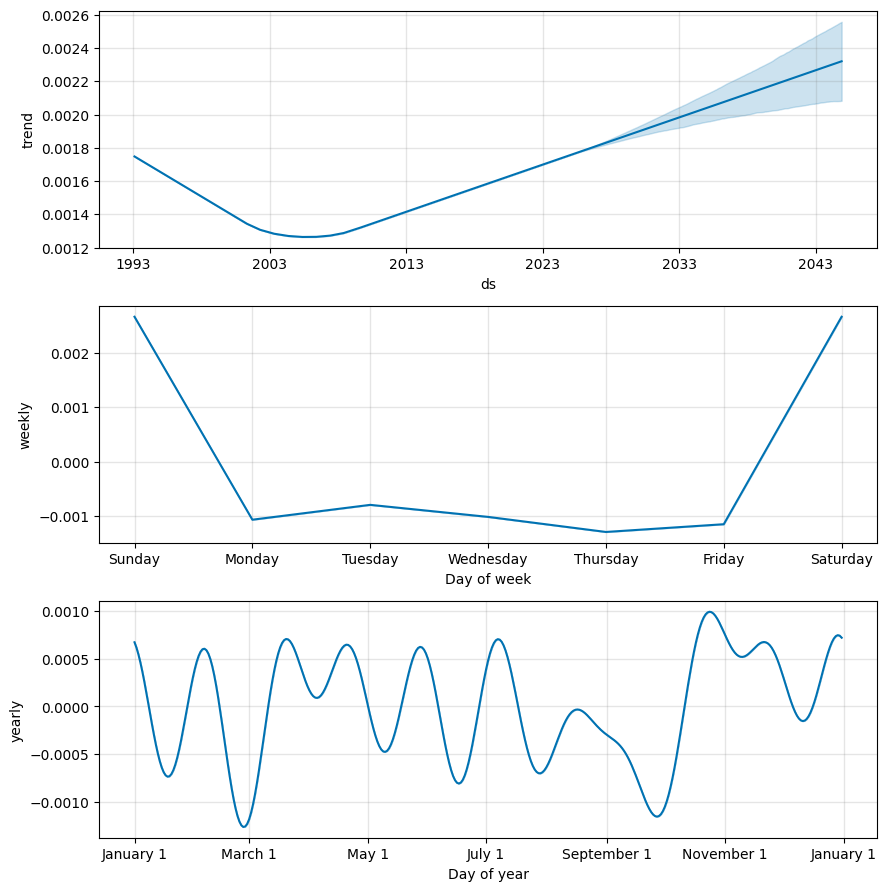

In [8]:
model.plot(forecast_full)
model.plot_components(forecast_full)

In [9]:
model2 = Prophet()
model2.fit(spy_week)
forecast_week = model2.predict(future)
print(forecast_week[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

19:40:39 - cmdstanpy - INFO - Chain [1] start processing
19:40:39 - cmdstanpy - INFO - Chain [1] done processing


              ds      yhat  yhat_lower  yhat_upper
15314 2044-11-25  0.007401   -0.024288    0.040653
15315 2044-11-26  0.007483   -0.024284    0.039061
15316 2044-11-27  0.007542   -0.024527    0.038842
15317 2044-11-28  0.007573   -0.026121    0.039819
15318 2044-11-29  0.007571   -0.023079    0.039915


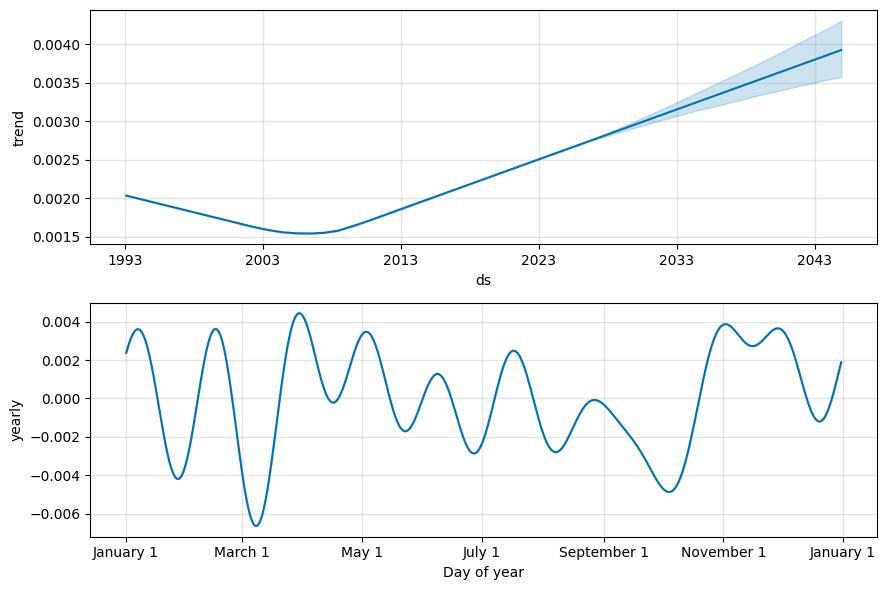

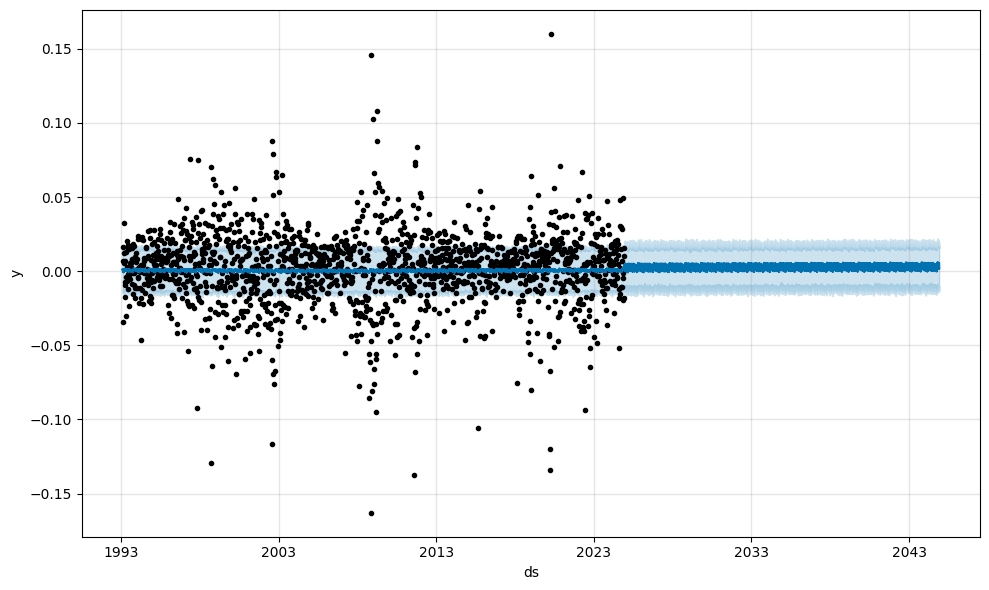

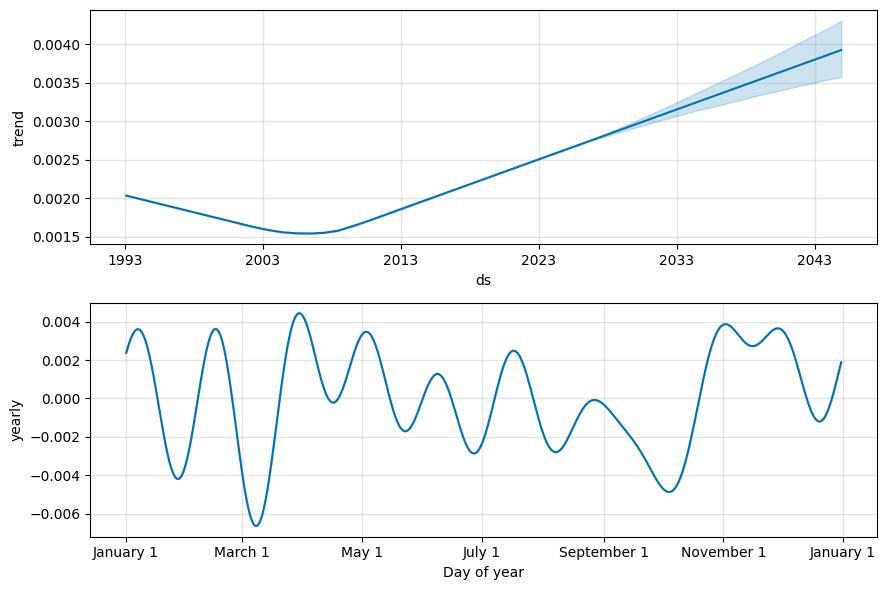

In [10]:
model2.plot(forecast_full)
model2.plot_components(forecast_week)

In [11]:
model3 = Prophet()
model3.fit(spy_month)
forecast_month = model3.predict(future)
print(forecast_month[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

19:40:43 - cmdstanpy - INFO - Chain [1] start processing
19:40:43 - cmdstanpy - INFO - Chain [1] done processing


              ds      yhat  yhat_lower  yhat_upper
15314 2044-11-25  0.010673   -0.050166    0.066220
15315 2044-11-26  0.014182   -0.046955    0.069578
15316 2044-11-27  0.017173   -0.040096    0.075277
15317 2044-11-28  0.019576   -0.038217    0.075460
15318 2044-11-29  0.021338   -0.037094    0.079468


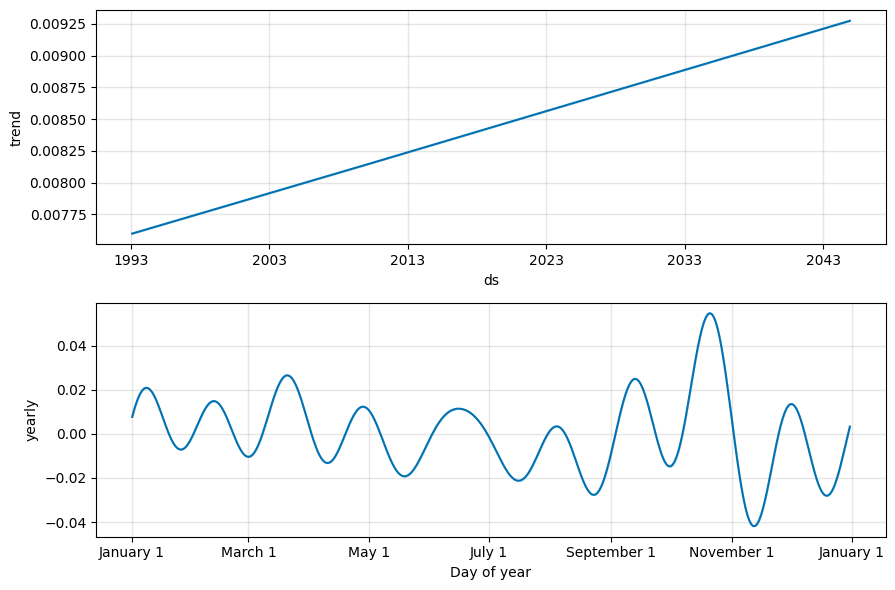

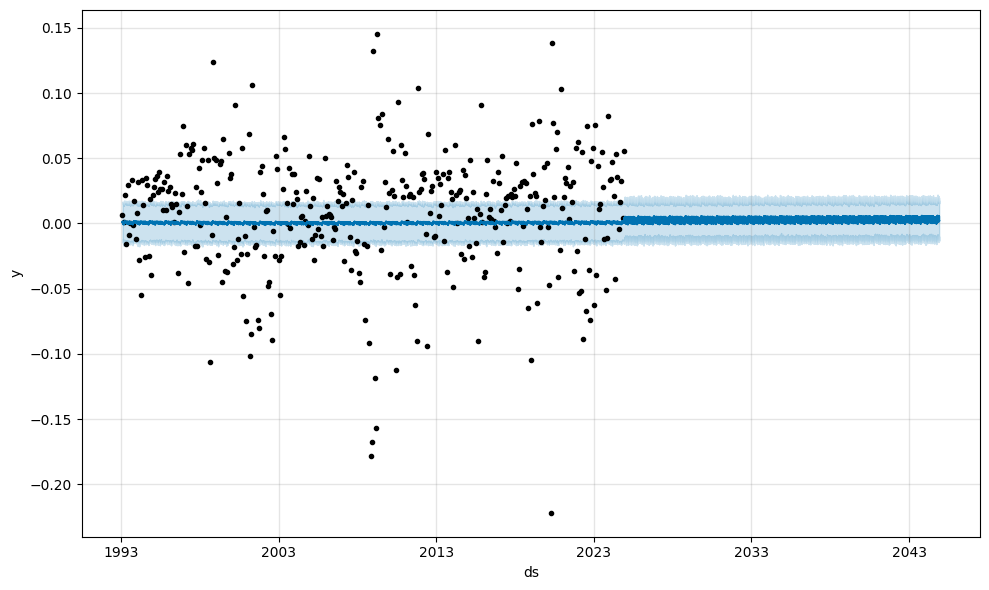

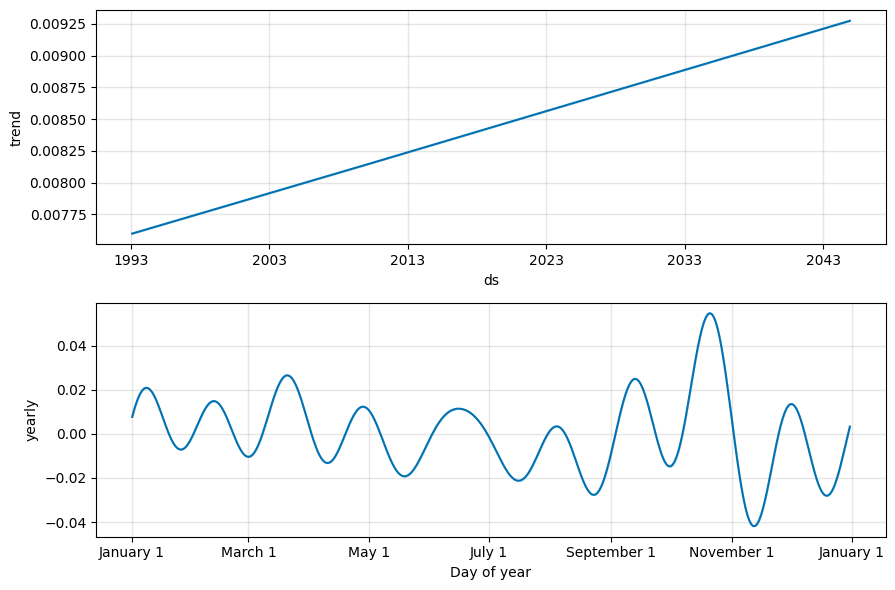

In [12]:
model3.plot(forecast_full)
model3.plot_components(forecast_month)

In [13]:
# Cross-validate the full dataset model
df_cv_full = cross_validation(model, initial='1095 days', period='365 days', horizon='365 days')
df_performance_full = performance_metrics(df_cv_full)
print("Full Dataset Performance:")
print(df_performance_full)

# Cross-validate the weekly dataset model
df_cv_weekly = cross_validation(model2, initial='1092 days', period='364 days', horizon='364 days')
df_performance_weekly = performance_metrics(df_cv_weekly)
print("Weekly Dataset Performance:")
print(df_performance_weekly)

# Cross-validate the monthly dataset model
df_cv_monthly = cross_validation(model3, initial='1098 days', period='366 days', horizon='366 days')
df_performance_monthly = performance_metrics(df_cv_monthly)
print("Monthly Dataset Performance:")
print(df_performance_monthly)

  0%|          | 0/28 [00:00<?, ?it/s]

19:40:48 - cmdstanpy - INFO - Chain [1] start processing
19:40:48 - cmdstanpy - INFO - Chain [1] done processing
19:40:48 - cmdstanpy - INFO - Chain [1] start processing
19:40:48 - cmdstanpy - INFO - Chain [1] done processing
19:40:49 - cmdstanpy - INFO - Chain [1] start processing
19:40:49 - cmdstanpy - INFO - Chain [1] done processing
19:40:49 - cmdstanpy - INFO - Chain [1] start processing
19:40:49 - cmdstanpy - INFO - Chain [1] done processing
19:40:50 - cmdstanpy - INFO - Chain [1] start processing
19:40:50 - cmdstanpy - INFO - Chain [1] done processing
19:40:50 - cmdstanpy - INFO - Chain [1] start processing
19:40:50 - cmdstanpy - INFO - Chain [1] done processing
19:40:51 - cmdstanpy - INFO - Chain [1] start processing
19:40:51 - cmdstanpy - INFO - Chain [1] done processing
19:40:51 - cmdstanpy - INFO - Chain [1] start processing
19:40:52 - cmdstanpy - INFO - Chain [1] done processing
19:40:52 - cmdstanpy - INFO - Chain [1] start processing
19:40:52 - cmdstanpy - INFO - Chain [1]

Full Dataset Performance:
     horizon       mse      rmse       mae     mdape     smape  coverage
0    39 days  0.000111  0.010550  0.007496  0.995563  1.683340  0.843395
1    40 days  0.000110  0.010503  0.007477  0.993790  1.680236  0.844034
2    41 days  0.000110  0.010483  0.007475  0.996193  1.683140  0.845739
3    42 days  0.000109  0.010426  0.007456  0.997565  1.686683  0.848580
4    43 days  0.000111  0.010550  0.007455  0.997565  1.684335  0.848224
..       ...       ...       ...       ...       ...       ...       ...
322 361 days  0.000171  0.013068  0.008357  0.984839  1.593433  0.824148
323 362 days  0.000170  0.013053  0.008332  0.982995  1.595282  0.824686
324 363 days  0.000167  0.012926  0.008188  0.981331  1.588534  0.830742
325 364 days  0.000165  0.012840  0.008115  0.981331  1.588406  0.831463
326 365 days  0.000167  0.012937  0.008205  0.983507  1.598791  0.824361

[327 rows x 7 columns]


  0%|          | 0/28 [00:00<?, ?it/s]

19:41:15 - cmdstanpy - INFO - Chain [1] start processing
19:41:15 - cmdstanpy - INFO - Chain [1] done processing
19:41:15 - cmdstanpy - INFO - Chain [1] start processing
19:41:15 - cmdstanpy - INFO - Chain [1] done processing
19:41:16 - cmdstanpy - INFO - Chain [1] start processing
19:41:16 - cmdstanpy - INFO - Chain [1] done processing
19:41:16 - cmdstanpy - INFO - Chain [1] start processing
19:41:16 - cmdstanpy - INFO - Chain [1] done processing
19:41:16 - cmdstanpy - INFO - Chain [1] start processing
19:41:16 - cmdstanpy - INFO - Chain [1] done processing
19:41:16 - cmdstanpy - INFO - Chain [1] start processing
19:41:16 - cmdstanpy - INFO - Chain [1] done processing
19:41:17 - cmdstanpy - INFO - Chain [1] start processing
19:41:17 - cmdstanpy - INFO - Chain [1] done processing
19:41:17 - cmdstanpy - INFO - Chain [1] start processing
19:41:17 - cmdstanpy - INFO - Chain [1] done processing
19:41:17 - cmdstanpy - INFO - Chain [1] start processing
19:41:17 - cmdstanpy - INFO - Chain [1]

Weekly Dataset Performance:
    horizon       mse      rmse       mae     mdape     smape  coverage
0   42 days  0.000573  0.023941  0.017577  0.984282  1.570249  0.813300
1   49 days  0.000555  0.023562  0.018120  1.009001  1.637065  0.807635
2   56 days  0.000604  0.024568  0.018637  0.999567  1.623088  0.810837
3   63 days  0.000556  0.023572  0.018388  0.993423  1.615871  0.835222
4   70 days  0.000586  0.024209  0.019005  0.998941  1.630804  0.835222
5   77 days  0.000644  0.025382  0.019911  1.007769  1.652017  0.810099
6   84 days  0.000701  0.026476  0.019915  1.011958  1.617720  0.813300
7   91 days  0.000754  0.027458  0.019943  1.015384  1.607658  0.818966
8   98 days  0.000873  0.029552  0.020279  1.027304  1.595371  0.783744
9  105 days  0.000952  0.030859  0.020925  1.079616  1.615198  0.773153
10 112 days  0.001075  0.032786  0.021080  1.028141  1.562149  0.777586
11 119 days  0.001025  0.032008  0.020624  1.020601  1.528804  0.793842
12 126 days  0.000879  0.029645  0.0

  0%|          | 0/28 [00:00<?, ?it/s]

19:41:23 - cmdstanpy - INFO - Chain [1] start processing
19:41:23 - cmdstanpy - INFO - Chain [1] done processing
19:41:24 - cmdstanpy - INFO - Chain [1] start processing
19:41:24 - cmdstanpy - INFO - Chain [1] done processing
19:41:24 - cmdstanpy - INFO - Chain [1] start processing
19:41:24 - cmdstanpy - INFO - Chain [1] done processing
19:41:24 - cmdstanpy - INFO - Chain [1] start processing
19:41:25 - cmdstanpy - INFO - Chain [1] done processing
19:41:25 - cmdstanpy - INFO - Chain [1] start processing
19:41:25 - cmdstanpy - INFO - Chain [1] done processing
19:41:25 - cmdstanpy - INFO - Chain [1] start processing
19:41:25 - cmdstanpy - INFO - Chain [1] done processing
19:41:26 - cmdstanpy - INFO - Chain [1] start processing
19:41:26 - cmdstanpy - INFO - Chain [1] done processing
19:41:26 - cmdstanpy - INFO - Chain [1] start processing
19:41:26 - cmdstanpy - INFO - Chain [1] done processing
19:41:26 - cmdstanpy - INFO - Chain [1] start processing
19:41:26 - cmdstanpy - INFO - Chain [1]

Monthly Dataset Performance:
     horizon       mse      rmse       mae      mape     mdape     smape  \
0    35 days  0.003214  0.056695  0.040458  1.052909  0.759344  1.231881   
1    36 days  0.003164  0.056250  0.039377  1.039084  0.759344  1.207280   
2    37 days  0.003111  0.055773  0.039020  1.022784  0.737673  1.200574   
3    38 days  0.003000  0.054768  0.038063  1.119666  0.759344  1.213381   
4    39 days  0.002997  0.054749  0.037848  1.109645  0.759344  1.200486   
..       ...       ...       ...       ...       ...       ...       ...   
225 353 days  0.002952  0.054328  0.040426  1.944922  1.069736  1.476216   
226 354 days  0.002923  0.054066  0.039783  1.795570  1.033251  1.424541   
227 355 days  0.003163  0.056239  0.041639  1.684870  0.980795  1.409353   
228 356 days  0.003231  0.056840  0.042865  1.760663  1.033251  1.459413   
229 366 days  0.003023  0.054985  0.041249  1.727221  0.962837  1.405813   

     coverage  
0    0.787879  
1    0.787879  
2    0.772

# Why This Matters

Each dataset has a different frequency (daily, weekly, monthly), so the cross-validation parameters must align with the nature of the data. Otherwise:

Using daily settings for weekly/monthly data results in too few or mismatched splits.
Weekly and monthly models will have fewer data points, so the time periods need to be adjusted accordingly.

# Understanding Prophet's Cross-Validation Parameters
1. initial
- Defines the initial training period, i.e., how much historical data to use for training in the first fold.
- It specifies how far back in time the training data starts relative to the earliest validation period.
- For example:
If initial='1095 days', the model is trained on the first 3 years of data before starting validation.

2. horizon
- Defines the forecast horizon, i.e., how far into the future the model is evaluated for predictions.
- Determines the length of the validation period.
- For example:
If horizon='365 days', the model's predictions are compared against the actual values 1 year (365 days) into the future.

3. period
- Defines the gap between successive validation cutoffs.
- It controls how often the training window is moved forward for the next validation.
- For example:
If period='365 days', the validation is performed every 1 year.

# How Cross-Validation Works in Prophet
## Prophet uses rolling origin cross-validation, which evaluates the model on successive validation sets as the training window shifts forward.

### Here’s a step-by-step example:

#### Setup
- Dataset: Historical data with daily frequency.
- Parameters:
    1. initial='1095 days': Use the first 3 years for training.
    2. horizon='365 days': Evaluate 1-year forecasts.
    3. period='365 days': Shift the training window by 1 year for each fold.


# Metrics from Cross-Validation
- *mse* (Mean Squared Error): Measures average squared error.
- *rmse* (Root Mean Squared Error): Error magnitude in the same unit as the target.
- *mae* (Mean Absolute Error): Average absolute error.
- *coverage*: Proportion of actual values within prediction intervals.


In [17]:
# Step 1: Get the last known price (P0)
P0 = spy_full['adj_close'].iloc[-1]  # Replace 'adj_close' with your actual price column

# Step 2: Calculate cumulative log returns
forecast_full['cumulative_log_return'] = forecast_full['yhat'].cumsum()

# Step 3: Convert cumulative log returns to prices
forecast_full['predicted_price'] = P0 * np.exp(forecast_full['cumulative_log_return'])

# View the results
print(forecast_full[['ds', 'yhat', 'cumulative_log_return', 'predicted_price']].tail())


              ds      yhat  cumulative_log_return  predicted_price
15314 2044-11-25  0.001773              18.070949     4.283256e+10
15315 2044-11-26  0.005559              18.076508     4.307135e+10
15316 2044-11-27  0.005515              18.082023     4.330953e+10
15317 2044-11-28  0.001724              18.083747     4.338424e+10
15318 2044-11-29  0.001940              18.085687     4.346849e+10


(array([ 597., 2906., 4922., 3970.,  831.,    7.,  157.,  649.,  837.,
         443.]),
 array([-0.00127426, -0.00054943,  0.00017539,  0.00090022,  0.00162505,
         0.00234987,  0.0030747 ,  0.00379953,  0.00452435,  0.00524918,
         0.00597401]),
 <BarContainer object of 10 artists>)

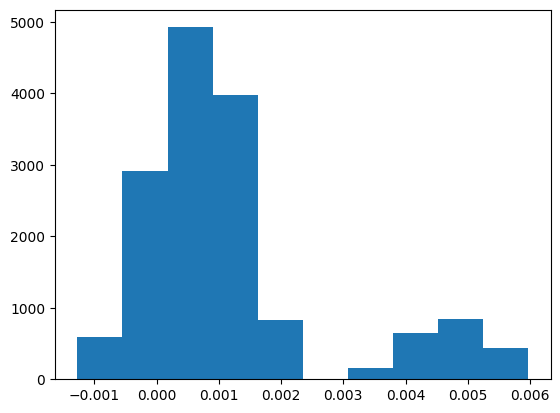

In [21]:
plt.hist(forecast_full['yhat'])

In [23]:
# Initialize the last known price (P0)
P0 = spy_full['adj_close'].iloc[-1]  # Replace 'adj_close' with your actual column name

# Create a new column to store predicted prices
forecast_full['iterative_price'] = 0  # Initialize with zeros

# Iterate through the forecast DataFrame to calculate prices
latest_price = P0  # Start with the last known price
for i in range(len(forecast_full)):
    log_return = forecast_full.loc[i, 'yhat']  # Get the predicted log return
    updated_price = latest_price * np.exp(log_return)  # Calculate the next price
    forecast_full.loc[i, 'iterative_price'] = updated_price  # Store the result
    latest_price = updated_price  # Update the latest price for the next step

# View the updated DataFrame
print(forecast_full[['ds', 'yhat', 'iterative_price']].tail())

C:\Users\Kaizu\AppData\Local\Temp\ipykernel_37220\1115200509.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '608.3085144759789' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  forecast_full.loc[i, 'iterative_price'] = updated_price  # Store the result


              ds      yhat  iterative_price
15314 2044-11-25  0.001773     4.283256e+10
15315 2044-11-26  0.005559     4.307135e+10
15316 2044-11-27  0.005515     4.330953e+10
15317 2044-11-28  0.001724     4.338424e+10
15318 2044-11-29  0.001940     4.346849e+10


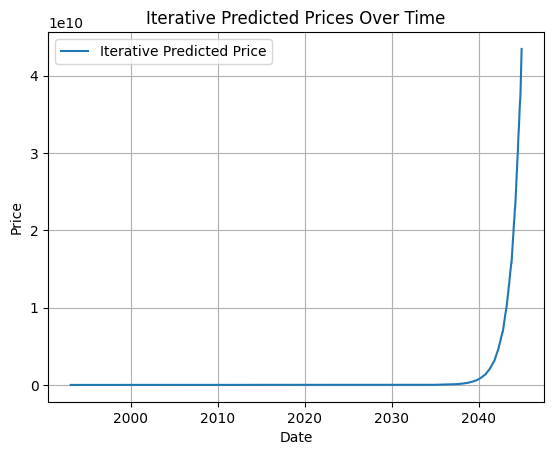

In [24]:
# Plot the iterative predicted prices
plt.plot(forecast_full['ds'], forecast_full['iterative_price'], label='Iterative Predicted Price')
plt.title('Iterative Predicted Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


# Why Log Returns are Not Feasible for Price Prediction with Prophet

Log returns are widely used in financial analysis due to their additive nature and ability to normalize price changes. However, their use in long-term forecasting with Prophet poses significant challenges. Prophet relies on historical patterns to predict future values, assuming trends and seasonality observed in the past will persist.

## Logical Reasoning

1. **Additivity of Log Returns**:
   - Log returns are additive, meaning the cumulative log return is simply the sum of individual log returns. While this property is useful for short-term analysis, it becomes problematic in long-term forecasting due to compounding effects when converting log returns back to prices.

2. **Extrapolation of Past Patterns**:
   - Prophet assumes that past patterns (e.g., trends, seasonality) will continue into the future. Over the past 30 years, financial markets have exhibited strong growth, which may bias the log return data. When these patterns are extrapolated, Prophet can predict log returns that, when converted to prices, result in unrealistic projections.

3. **Compounding Effects**:
   - When cumulative log returns are converted back to prices using the formula:
     \[
     P_t = P_0 x e^{{cumulative\_log\_return}}
     \]
     even small overestimates in log returns can lead to exponential growth in price predictions. This compounding effect can create price forecasts that spiral out of control, especially for long horizons.

## Conclusion

Using price data directly mitigates these issues by allowing Prophet to model trends and seasonality without the distortions introduced by cumulative log returns. Price data provides a more stable and interpretable basis for forecasting future trends, making it a more suitable choice for long-term price prediction.

